Hi, I am a graduate Electronics and Communications Engineer who decided to shift to Data sciecne and Machine learning and in this kernel i will be disscussing explicitly the problem of prediction the toxic/non toxic/threat people on board of titanic, i will come across several concepts and techniques spanning data visualization, Machine learning and Deep learning trying to state the best model working on this specific dataset.

*Please upvote and share if this helps you!! Also, feel free to fork this kernel to play around with the code and test it for yourself. If you plan to use any part of this code, please reference this kernel!* I will be glad to answer any questions you may have in the comments. Thank You! 

*Make sure to follow me for Future Kernels even better than this one!*


# Toxic Comment Classification Challenge
The Conversation AI team, a research initiative founded by Jigsaw and Google (both a part of Alphabet) are working on tools to help improve online conversation. One area of focus is the study of negative online behaviors, like toxic comments (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion). So far they’ve built a range of publicly available models served through the Perspective API, including toxicity. But the current models still make errors, and they don’t allow users to select which types of toxicity they’re interested in finding (e.g. some platforms may be fine with profanity, but not with other types of toxic content).

In this competition, you’re challenged to build a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate better than Perspective’s current models. You’ll be using a dataset of comments from Wikipedia’s talk page edits. Improvements to the current model will hopefully help online discussion become more productive and respectful. so in other words we are challenged to classify text to **Toxic, Non Toxic, Threat and so on**

Please upvote and share if this helps you!! Also, feel free to fork this kernel to play around with the code and test it for yourself. If you plan to use any part of this code, please reference this kernel! I will be glad to answer any questions you may have in the comments. Thank You!

Make sure to follow me for Future Kernels even better than this one

# NLP
## Can Computers Understand Language?

As long as computers have been around, programmers have been trying to write programs that understand languages like English. The reason is pretty obvious — humans have been writing things down for thousands of years and it would be really helpful if a computer could read and understand all that data.

Computers can’t yet truly understand English in the way that humans do — but they can already do a lot! In certain limited areas, what you can do with NLP already seems like magic. You might be able to save a lot of time by applying NLP techniques to your own projects.

And even better, the latest advances in NLP are easily accessible through open source Python libraries like spaCy, textacy, and neuralcoref. What you can do with just a few lines of python is amazing.
Extracting Meaning from Text is Hard

The process of reading and understanding English is very complex — and that’s not even considering that English doesn’t follow logical and consistent rules. For example, what does this news headline mean?

    “Environmental regulators grill business owner over illegal coal fires.”

Are the regulators questioning a business owner about burning coal illegally? Or are the regulators literally cooking the business owner? As you can see, parsing English with a computer is going to be complicated.

Doing anything complicated in machine learning usually means building a pipeline. The idea is to break up your problem into very small pieces and then use machine learning to solve each smaller piece separately. Then by chaining together several machine learning models that feed into each other, you can do very complicated things.

And that’s exactly the strategy we are going to use for NLP. We’ll break down the process of understanding English into small chunks and see how each one works.
Building an NLP Pipeline, Step-by-Step
## Application of NLP in real life
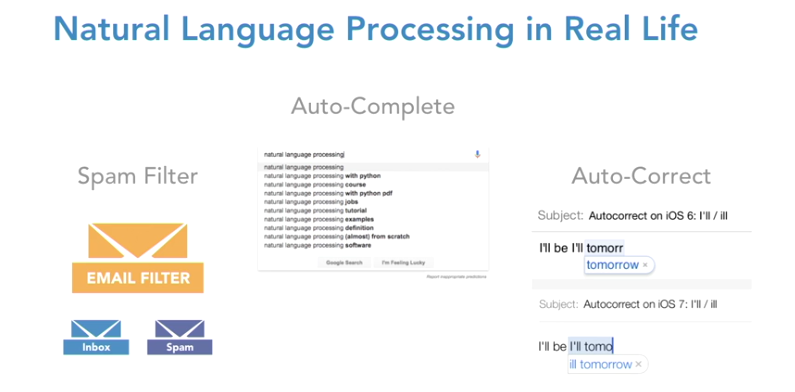

# Unstructred Data
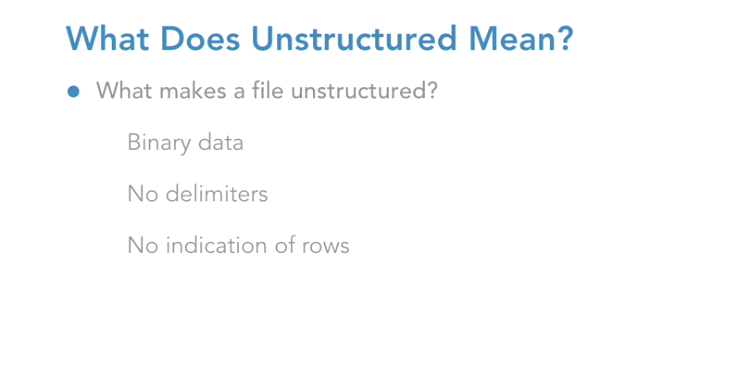
So there is nothing to indicate for example if you are having an email nothing to indicate where is the body, subject and the end
the text is considered as a semi structured or unstructure data but since Kaggle is putting our data in a tables so it gives our data a sense of structure so THANKS Kaggle.
## Word Representations
### One Hot
In machine learning vector space terms, this is a vector with one 1 and a lot of zeroes [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Deep learning people call this a “one hot” representation so in other words let's say we have a dictionary of all words, in order to represent a certain word we are putting 1 infront of the word in the dictionary and other wise zero to build up the vector of this word, but there is a problem with that representation that i can't relate any words to similar other words so let's have a real world example if you are searching for f user searches for [Dell notebook battery size], we would like to match documents with 
“
Dell laptop battery capacity
”
and actually this couldn't be taken place here as 
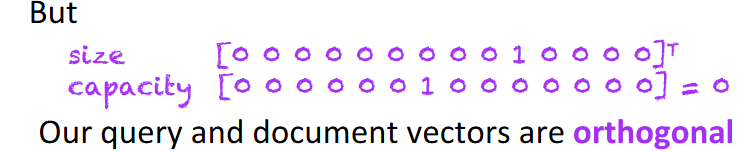)

Our query and document vectors are orthogonal There is no natural notion of similarity in a set of one hot vectors
So a solution to that is using  distributional similarity based representations, so instead of having only a vector representation of just the word you are no having 2 vectors 1 for the main word and other for the context around it (before and after words)
so instead we are having a model that could predict the context given the word.
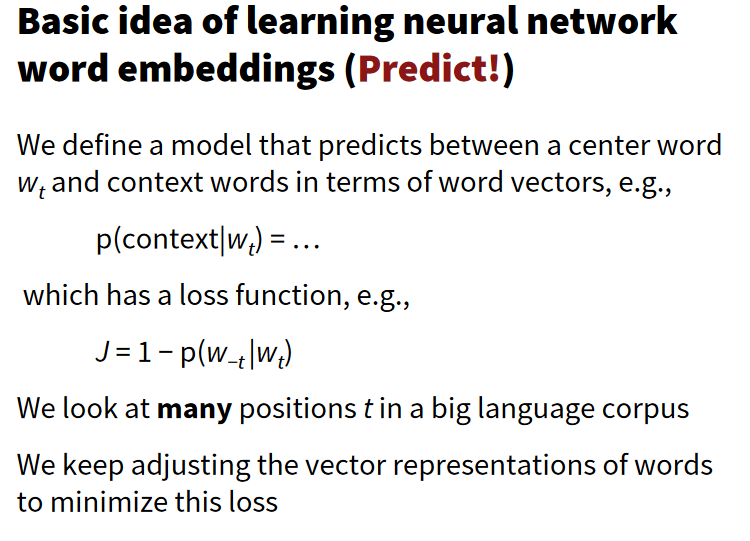
Actually word2vec model came out from this idea of predicting the context of a word through it's distributional representation

# Word2Vec
## skip-grams
Predict the context given target, so for each step your model will consider a certain word as the center word and will predicts context words (after and before that word) 
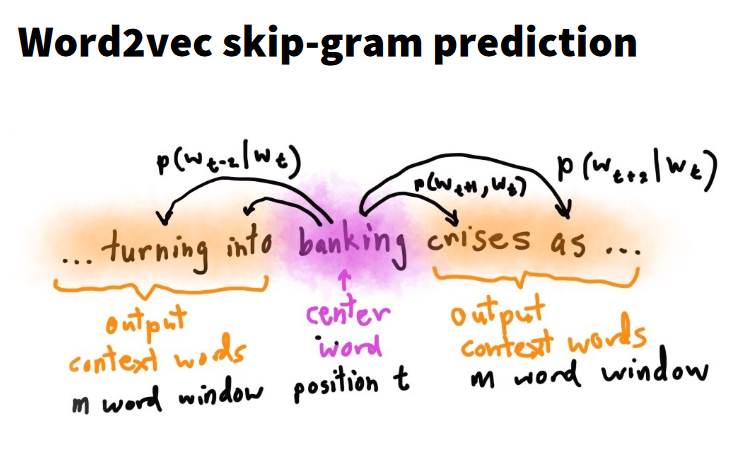
so as it appears we pick a center word and predict its context (the words before and after it) maximizing some words vectors that we think they might be in its context and then compute the loss
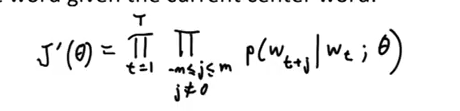
J: loss fn
wt: center word
wt+j: the context so we maximize the probability of this prediction and compute the loss aftewards


**# Contents
1. [Importing Libraries and Packages](#p1)
2. [Loading and Viewing Data Set](#p2)
3. [Data Cleaning](#p3)
4. [Feature Engineering](#p4)

<a id="p1"></a>
# 1. Importing Libraries and Packages

In [ ]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re
import nltk
import matplotlib.gridspec as gridspec 
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

<a id="p2"></a>
# 2. Loading and Viewing Data Set
With Pandas, we can load both csv files including the training and testing set that we wil later use to train and test our model. Before we begin, we should take a look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics as mean,std and count values . We can also look at its keys and column names.

In [ ]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
all_data =[train, test]
train.sample(20)

## Columns
id : the comment id
Comment_text: the raw words of the comment

    toxic  if true 1 otherwise 0
    severe_toxic
    obscene
    threat
    insult
    identity_hate


## Evaluation 
this is actually how kaggle would evaluate our modeling so we should be sure we understand it clearly before we proceed.
For each id in the test set, you must predict a probability for each of the six possible types of comment toxicity (toxic, severe_toxic, obscene, threat, insult, identity_hate). The columns must be in the same order as shown below. The file should contain a header and have the following format:

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb,12,0.5,0.5,0.5,0.5,0.5,0.5
0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
etc.


In [ ]:
print("out of {} rows {} are toxic ,{} are severe_toxic, {} are obscene, {} are threat,{} are insult and {} are identity_hate".format(len(train),len(train[train.toxic==1]),len(train[train.severe_toxic==1]),len(train[train.obscene==1]),len(train[train.threat==1]),len(train[train.insult==1]),len(train[train.identity_hate==1])))

In [ ]:
print("See the data types of the training set")
train.dtypes

In [ ]:
print("Print the statistical review of the training set")
train.describe()

In [ ]:
print("toxic examples:")
train[train['toxic']==1]['comment_text']

In [ ]:
print("severe_toxic examples:")
train[train['severe_toxic']==1]['comment_text']

In [ ]:
print("obscene examples:")
train[train['obscene']==1]['comment_text'][:5]

In [ ]:
print("threatthreat examples:")
train[train['threat']==1]['comment_text'][:5]

In [ ]:
print("insult examples:")
train[train['insult']==1]['comment_text'][:5]

In [ ]:
train.head()

Let's create a feature called "clean" for clean comments that are neither toxi nor a threat n, and so on , this step will help us alot to see what features are making the comment to be toxic

In [ ]:
rowsums=train.iloc[:,2:].sum(axis=1) # sum the rows from column 2 to the end
train['clean']=(rowsums==0)# put the sum = 0 which is consider as a clean comment to clean

<a id="p3"></a>
# 3. Data Cleaning(Handling missing values) 
The first thing I do when I get a new dataset is take a look at some of it. This lets me see that it all read in correctly and get an idea of what's going on with the data. In this case, I'm looking to see if I see any missing values, which will be reprsented with NaN or None.
## See how many missing data points we have


In [ ]:
train.isnull().any(),test.isnull().any()

Looks like we don't need to deal with the null values after all!

Note that: There are tons of preprocessing and feature engineering steps you could do for the dataset, but our focus today is not about the preprocessing task so what we are doing here is the minimal that could get the rest of the steps work well.

In [ ]:
print("display variations in the length of the comments as you can see a very large std value indicates that")
lens = train.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

In [ ]:
lens.hist();

Movng on, as you can see from the sneak peek, the dependent variables are in the training set itself so we need to split them up, into X and Y sets.

## Remove Punctuation
For us human the words "I love NLP" and "I love NLP. " is the same but are they having the same meaning to python let's figure this out

In [ ]:
"I love NLP" == "I love NLP."

No !! so we will need to remove any sort of punctuation in our text data in order not to confuse Python, let's first what a punctuation looks like in ptyhon


In [ ]:
string.punctuation

In [ ]:
test.head()

In [ ]:
print("Create a fn that remove any sort of punctuation")
def remove_pun(text):
    text_nopunc = "".join([char for char in text if char not in string.punctuation]) # as we are interating through char we need join to join words together without spacing
    return text_nopunc
for data in all_data:
    data['clean_text']=data['comment_text'].apply(lambda x:remove_pun(x))
train.head()

We need then to split our sentences to words and then to a numeric representation so our model could deal with it as i mentioned in my previous kernel [here](https://www.kaggle.com/omarayman/the-home-for-future-data-scientists) that any machine learning model will have to deal with numbers let's first clean our text data as we have words like haven't , im and \n and our models won't understand that these are two different words so will have to split them

I have borrowed the follwing function from this incredible kernel 

In [ ]:
corpus = train.clean_text
corpus

## Tokenize

In [ ]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    comment=comment.lower()
    #remove \n
    comment=re.sub("\\n","",comment)    
    tokens = re.split('\W+',comment)
    return tokens

In [ ]:
print("let's give it a try")
corpus.iloc[12235]

In [ ]:
print("See the change")
clean(corpus.iloc[12235])

In [ ]:
train['body_text_tokenized']=corpus.apply(lambda x :clean(x))



We need to build fn that allows us to see the full rows/columns in data when we hit .head() or .tail()


## Remove stop words

Now is the step of removing some of the stop words that doesnot contribute much to the meaning of the sentence and won't help our model much as I,the,me, if so we will need to remove it to limit the number of tokens Python actually has to look at when learning for example if we have the sentence: I am learning NLP, this would be 4 tokens but after cleaning and removing the stop words we will have just 2 tokens which are learning NLP.

In [ ]:
print("let's have a look on the nexamples of stop words")
stopwords = nltk.corpus.stopwords.words('english')
stopwords

In [ ]:
print('as always lets write our function that removes stop words')
def remove_stop_words(text):
      words = [word for word in text if word not in  stopwords]
      return words
print("calling the fn on our tokenized column")
train['tokens_without_stopw'] = train['body_text_tokenized'].apply(lambda x :remove_stop_words(x))

In [ ]:
train.head(15)

## Stemming
Process of reducing inflected (or sometimes derived) words to their word stem or root, crudely chopping off the end of the word to leave only the base so that our model could learn less things than before for example Electricity/electrical goes down to just electric
but there is a problem with this approach that for soe words as Meanness/meaning these words will boils down to mean and Python will deal with them as they are having the same meaning.

### Why do we care 
it is heavly reducing what our models should look at actually if you think of example of text having grow, grows,growing,grown these are 4 tokens and python won't be able to relate those tokens to each other but if we instead we will just care about grow so it will save the memory with 4 times !!

In [ ]:
print("have an example to make things clear")
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

In [ ]:
#print("lets implement our fn to stem the words in our comments")
#   text = [ps.stem(word) for word in text]
 #   return text
#print("calling our fn on our tokens_without_stopw column")
#train['text_stemming'] = train['tokens_without_stopw'].apply(lambda x:stemming(x))

In [ ]:
train.head()

## lemmatizing
Actually does the same job as stemming BUT lemmatizing using the vocabulary analysis of words aiming to remove inflectional endings to return the dictionary form of a word, if you are confused i dont blame you, let's dive into it ,stemming typically faster as it simply chops off the end of a word without any understanding of the context in which a word is used so it's less acurate as because of that maybe it crashed and didn't work with me upwards HAHAHA :D while lemmatizing is typically more accurate as it's creating groups with similar meaning based on the context around the word, it will always return a dictionary word but it may be computationally expensive.

In [ ]:
def lemmatizing(text):
    text = [wn.lemmatize(word) for word in text]
    return text
print("calling our fn on our tokens_without_stopw column")
train['text_lemmatize'] = train['tokens_without_stopw'].apply(lambda x:lemmatizing(x))

In [ ]:
train.text_lemmatize

## Vectorization
### Count Vectorization
converting a sentence to a numerical representation to be understood by our model so let me wrap up what we have done so far
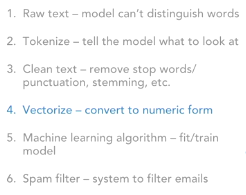
then after that will have each word contained in the text as a column and 1 indicating the text having a word and 0 otherwise and will end up with a matrix like this
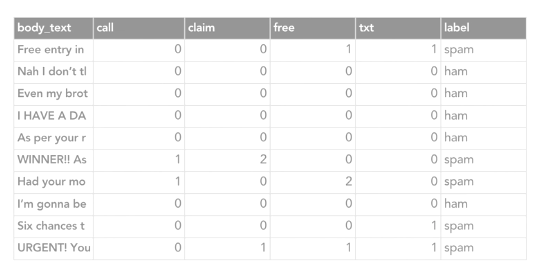
so our model roughly check for the number of occurance of some words, sentence and correlates that to any of our classes through creating relations between the occurence of some words and the classes choosed so let's see an example
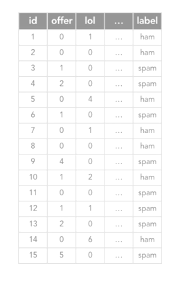
we are now have that intution that word offer is related with a spam mails and word lol is not 
### N-gram 
it's actually working the same as count vectorization but regards our columns instead of having one word per column we are having all the combination of words for example "i love nlp so much" will break to "i love", "love nlp","nlp so","so much" if we are having bigram(2 words) there are another examples of trigrams(3 words per column) so the common question , what to choose , actually we will tune these parameters and pick what works the best for our model

In [ ]:
print("our data shape")
train.shape

In [ ]:
train.T

In [ ]:
#the range of ngram we would like to look for
#ngram should be dealing with the full sentence not the tokenized one
ngram_vect=CountVectorizer(ngram_range=(2,2))
x_counts=ngram_vect.fit_transform(train[:25].clean_text)
print(x_counts.shape)
print(ngram_vect.get_feature_names())


## Implementing an N-grams


In [ ]:
x_counts_df = pd.DataFrame(x_counts.toarray())
x_counts_df.columns = ngram_vect.get_feature_names()
x_counts_df.T

So this is the N-gram looking for a sample of data so you can see the counts of the ngrams we have built on our data
## TF-IDF 
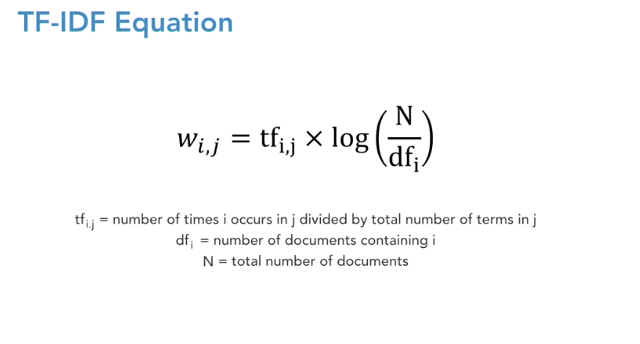
the term here is actually following different approach instead of showing how many times a word or a combination of words is occuring we are showing the weigh of the word in the data by a simple equation above,note(df is the number of occurence)
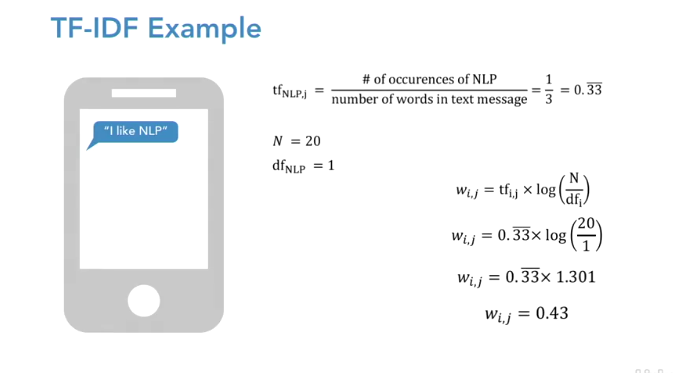

<a id="p4"></a>
# 4. Feature engineering
feature engineering is the process is as simple as that creating a new features from the data we are having in our case may be it could be a certain % of capital letters in word might consider more toxic, we begin with a hypothesis that the toxic comments is has more characters than others and will see in a couple of minutes if this hypothesis is justifying or not, let's create some extra feature that could help us in our model, Thanks to  [this](https://www.kaggle.com/eikedehling/feature-engineering) kernel for figuring this out for us

In [ ]:
for data in all_data:
    data['total_length'] = data['comment_text'].apply(len)
    data['capitals'] = data['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    data['caps_vs_length'] = data.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
    data['num_exclamation_marks'] = data['comment_text'].apply(lambda comment: comment.count('!'))
    data['num_question_marks'] = data['comment_text'].apply(lambda comment: comment.count('?'))
    data['num_punctuation'] = data['comment_text'].apply(
        lambda comment: sum(comment.count(w) for w in '.,;:'))
    data['num_symbols'] = data['comment_text'].apply(
        lambda comment: sum(comment.count(w) for w in '*&$%'))
    data['num_words'] = data['comment_text'].apply(lambda comment: len(comment.split()))
    data['num_unique_words'] = data['comment_text'].apply(
        lambda comment: len(set(w for w in comment.split())))
    data['words_vs_unique'] = data['num_unique_words'] / data['num_words']
    data['num_smilies'] = data['comment_text'].apply(
        lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [ ]:
train.head().T

# Evaluate created features
let's see if the features we picked are worth and will make our learning process is easier or not by actually visualizing them using Correlation map to visualize the linear relation between our newly created features if this didn''t help us out we should try scatter plot to visualize the non linear relation

In [ ]:
target = train.loc[:,['clean','toxic','severe_toxic','obscene','threat','insult','identity_hate','total_length','capitals','caps_vs_length','num_exclamation_marks','num_question_marks','num_punctuation','num_symbols','num_words','num_unique_words','words_vs_unique','num_smilies']] 

In [ ]:
target.clean=target.clean.map({True:1,False:0})

## Linear relationship

In [ ]:
colormap = plt.cm.plasma
plt.figure(figsize=(20,20))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

As you can deduce the squares that tend to be yellow are an indication that the two features connected to it are highly correlated, for further info see [link](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/) 

## Non linear relationship

In [ ]:
bins = np.linspace(0,500,40)

plt.hist(target[target['clean']==1]['total_length'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['total_length'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()
# Look at the X-axis both labels got the same distribution on x-axis so this feature won't help us 

In [ ]:
bins = np.linspace(0,110,40)

plt.hist(target[target['clean']==1]['capitals'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['capitals'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()

In [ ]:
bins = np.linspace(0,100,40)

plt.hist(target[target['clean']==1]['caps_vs_length'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['caps_vs_length'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()
#This feature will help our model as you can see all values of caps_vs_length are labelled as not clean comments

In [ ]:
bins = np.linspace(0,100,40)

plt.hist(target[target['clean']==1]['num_exclamation_marks'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['num_exclamation_marks'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()
#This feature will help us out as all values from this feature is labelled as Not Clean comments

In [ ]:
bins = np.linspace(0,100,40)

plt.hist(target[target['clean']==1]['num_question_marks'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['num_question_marks'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()
# what do you think of this feature? 
# it's useful you are right :D

In [ ]:
bins = np.linspace(0,100,40)

plt.hist(target[target['clean']==1]['num_punctuation'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['num_punctuation'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()
#They got the same distribution so it won't help our model

In [ ]:
bins = np.linspace(0,4,40)

plt.hist(target[target['clean']==1]['num_symbols'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['num_symbols'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()

In [ ]:
bins = np.linspace(0,100,40)

plt.hist(target[target['clean']==1]['num_words'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['num_words'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()

In [ ]:
bins = np.linspace(0,300,40)

plt.hist(target[target['clean']==1]['num_unique_words'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['num_unique_words'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()

In [ ]:
bins = np.linspace(0,10,40)

plt.hist(target[target['clean']==1]['words_vs_unique'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['words_vs_unique'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()

In [ ]:
bins = np.linspace(0,0.5,40)

plt.hist(target[target['clean']==1]['num_smilies'],bins,alpha=0.5,normed=True,label='Clean')
plt.hist(target[target['clean']==0]['num_smilies'],bins,alpha=0.5,normed=True,label='Not Clean')
plt.legend(loc='upper left')
plt.show()

In [ ]:
train.head().T

For Memory sake i will be using TF-IDF in another kernel, don't worry people i will complete solving the problem but let's consider this kernel for feature analysis and data visualization.

**If you made it this far, congratulations!! You have gotten a glimpse at an introduction to data visualization, analysis and Deep Learning. You are well on your way to become a Data Science expert! Keep learning and trying out new things, as one of the most important things for Data Scientists is to be creative and perform analysis hands-on. Please upvote and share if this kernel helped you!**